# Battle of Neighbourhoods - WEEK 1

## DATA

The data that will be used to solve this problem includes:
1. Foresquare location data of the city of Torornto will be used to explore the neighbourhoods
2. The Torornto Postal Code data from wiki. This data includes both the Borough and the assigned Neighbourhood. This will be used as input for the Foresquare API.
    https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M  


Below is a screen shot of the required data for the analysis, and it is defined by: 
1. Postal Code - This is the code used to unique identify various Boroughs
2. Borough - This is district classified based on administrative units
3. Neighbourhood - This are the various sub-classifications under the Borough
4. Latitude - the angular distance of a place north or south of the earth's equator
5. Longitude - the angular distance of a place east or west of the Greenwich meridian

*(The longitude and latitude combined makes up the co-ordinates of a location on the map)*

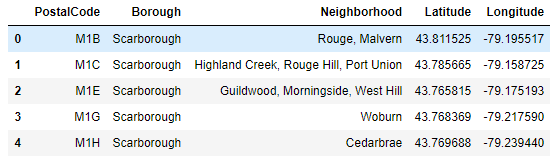